# Data challenge 3 second project

In [201]:
import pickle
import os
import sys
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the papers data and extract the features from the txt file

In [202]:
import pandas as pd

# Function to parse the papers.txt file and create a DataFrame
def parse_papers(file_path):
    # Read the content of the file
    with open(file_path, "r", encoding='utf-8') as file:
        data = file.read()
    
    # Split the data by paper blocks (separated by two newlines or '#*')
    paper_blocks = data.strip().split("\n\n")

    papers = []
    for block in paper_blocks:
        paper_data = {}
        lines = block.split("\n")
        
        for line in lines:
            # Title: line starts with '#*'
            if line.startswith("#*"):
                paper_data["title"] = line[2:].strip()
            # Authors: line starts with '#@'
            elif line.startswith("#@"):
                paper_data["authors"] = line[2:].strip()
            # Year: line starts with '#t'
            elif line.startswith("#t"):
                paper_data["year"] = line[2:].strip()
            # Citations: line starts with '#c'
            elif line.startswith("#c"):
                paper_data["citations"] = line[2:].strip()
            # Index: line starts with '#index'
            elif line.startswith("#index"):
                paper_data["index"] = line[6:].strip()
            # Additional comments or description (optional): lines starting with '#!' (can be ignored for the DataFrame)
            elif line.startswith("#!"):
                continue
        
        papers.append(paper_data)

    # Convert the list of papers into a DataFrame
    df = pd.DataFrame(papers)
    return df

# Path to the file
file_path = "Data/papers.txt" 

# Parse the data and create a DataFrame
df = parse_papers(file_path)


In [203]:
#df = pd.read_csv('Data/papers.csv')

In [204]:
df['index'] = df['index'].astype(str)

In [205]:
# import the picke file 
with open('Data/pid_cat_dict.pkl', 'rb') as file:
    picke_df = pickle.load(file)

picke_df = pd.DataFrame(picke_df.items(), columns=['index', 'categories'])

#  Merge the two dataframes
df = df.merge(picke_df, on='index', how='left')

In [206]:
picke_df

,index,categories
0,0,"[13, 18]"
1,1,"[18, 25]"
2,2,"[6, 11]"
3,3,[18]
4,4,"[17, 19]"
...,...,...
629809,629809,[34]
629810,629810,[33]
629811,629811,"[1, 21]"
629812,629812,"[1, 18]"


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629814 entries, 0 to 629813
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   title       629814 non-null  object
 1   authors     603898 non-null  object
 2   year        629814 non-null  int64 
 3   venue       531220 non-null  object
 4   index       629814 non-null  object
 5   citations   125372 non-null  object
 6   abstract    281080 non-null  object
 7   categories  629814 non-null  object
dtypes: int64(1), object(7)
memory usage: 38.4+ MB


In [208]:
df.head(5)

,title,authors,year,venue,index,citations,abstract,categories
0,Automated Deduction in Geometry: 5th Internati...,"Hoon Hong,Dongming Wang",2006,NaN,0,NaN,NaN,"[13, 18]"
1,A+ Certification Core Hardware (Text & Lab Man...,Charles J. Brooks,2003,NaN,1,NaN,NaN,"[18, 25]"
2,Performance engineering in industry: current p...,"Ahmed E. Hassan,Parminder Flora",2007,Proceedings of the 6th international workshop ...,2,NaN,This panel session discusses performance engin...,"[6, 11]"
3,"Dude, You Can Do It! How to Build a Sweeet PC","Darrel Creacy,Carlito Vicencio",2005,NaN,3,NaN,Whether you're frustrated with current PC offe...,[18]
4,What Every Programmer Needs to Know about Secu...,"Neil Daswani,Anita Kesavan",2006,NaN,4,NaN,NaN,"[17, 19]"


In [209]:
df[df['citations'].notnull()]

,title,authors,year,venue,index,citations,abstract,categories
5,Interpreting Kullback-Leibler divergence with ...,"Shinto Eguchi,John Copas",2006,Journal of Multivariate Analysis,5,436405,Kullback-Leibler divergence and the Neyman-Pea...,[34]
17,Approximating fluid schedules in crossbar pack...,"Michael Rosenblum,Constantine Caramanis,Michel...",2006,IEEE/ACM Transactions on Networking (TON),17,357875;214023;317448;319987;334185;95255;29412...,We consider a problem motivated by the desire ...,[2]
24,On product covering in 3-tier supply chain mod...,"Jianer Chen,Fenghui Zhang",2006,Theoretical Computer Science,24,251778;436906;623227;287885,The field of supply chain management has been ...,"[5, 13, 22]"
35,An Integrative Modelling Approach for Simulati...,"Tibor Bosse,Catholijn M. Jonker,Jan Treur",2006,Proceedings of the 39th annual Symposium on Si...,35,247215;618899,To simulate adaptive agents with abilities mat...,"[0, 5, 9, 32]"
53,Class-specific feature polynomial classifier f...,"Cheng-Lin Liu,Hiroshi Sako",2006,Pattern Recognition,53,159598;603894;586607;471174;87254;302739;449562,The polynomial classifier (PC) that takes the ...,"[4, 17, 20]"
...,...,...,...,...,...,...,...,...
629803,Visualizing Proof Search for Theorem Prover De...,"John Byrnes,Michael Buchanan,Michael Ernst,Phi...",2009,Electronic Notes in Theoretical Computer Scien...,629803,101969;556422;566234;573428;622705,We describe an interactive visualization tool ...,"[10, 16]"
629804,SENTINEL: a semantic business process monitori...,"Carlos Pedrinaci,Dave Lambert,Branimir Wetzste...",2008,Proceedings of the first international worksho...,629804,12156;29272;29779;88763;261856;340817;408390;4...,Business Activity Monitoring (BAM) aims to sup...,[0]
629806,Effectiveness and usability of an online help ...,"Jérôme Simonin,Noëlle Carbonell,Danielle Pelé",2008,Proceedings of the 10th international conferen...,629806,8543;327540;395578;397153;398612,An empirical study is presented which aims at ...,[32]
629807,Busy period analysis of finite QBD processes,"Chaitanya Garikiparthi,Appie van de Liefvoort,...",2008,ACM SIGMETRICS Performance Evaluation Review,629807,340965,We present the number of customers served and ...,[9]


In [210]:
df[df['citations'].notnull() & df['venue'].isnull()]

,title,authors,year,venue,index,citations,abstract,categories
588028,201 principles of software development,Alan M. Davis,1995,NaN,588028,164122;206639;510740;520097,From the Preface If software engineering is re...,"[8, 10]"
619912,The architecture of concurrent programs,Per Brinch Hansen,1977,NaN,619912,240173;322192;327623;332514;335280,From the Preface CONCURRENT PROGRAMMING This b...,[22]


This suggests that every paper with citations in your dataset also has venue information.


This is logical because academic papers that cite other works are typically formal publications (e.g., journal articles, conference papers), and formal publications almost always have venue details. Papers without venue details might be drafts, unpublished works, or non-traditional outputs that don't cite other papers in your dataset.

In [211]:
#df.describe()

In [212]:
picke_df

,index,categories
0,0,"[13, 18]"
1,1,"[18, 25]"
2,2,"[6, 11]"
3,3,[18]
4,4,"[17, 19]"
...,...,...
629809,629809,[34]
629810,629810,[33]
629811,629811,"[1, 21]"
629812,629812,"[1, 18]"


Encoding

In [213]:
categories_flat = [category for sublist in df['categories'] for category in sublist]
unique_categories = sorted(set(categories_flat))

for category in unique_categories:
    df[f'category_{category}'] = df['categories'].apply(lambda x: 1 if category in x else 0)

In [214]:
(df['authors'])

0                                  Hoon Hong,Dongming Wang
1                                        Charles J. Brooks
2                          Ahmed E. Hassan,Parminder Flora
3                           Darrel Creacy,Carlito Vicencio
4                               Neil Daswani,Anita Kesavan
                                ...                       
629809                                                 NaN
629810                                                 NaN
629811             Manolis Perakakis,Alexandros Potamianos
629812                                          V. K. Jain
629813    Maryam Shokri,Hamid R. Tizhoosh,Mohamed S. Kamel
Name: authors, Length: 629814, dtype: object

In [215]:
# fillna with '' for authors
df['authors'] = df['authors'].fillna('')

In [216]:
# give the rows which have empty authors
df['authors_list'] = df['authors'].apply(lambda x: [author.strip() for author in x.split(",")])

# Step 2: Check for empty authors
empty_authors_df = df[df['authors_list'].apply(lambda x: any(not author for author in x))]

In [217]:
empty_authors_df[empty_authors_df['citations'].notnull()].shape

(290, 44)

In [218]:
def display_for_index(index, ls_columns=None):
    if ls_columns:
        display(df[df['index'] == index][ls_columns])
    else:
        display(df[df['index'] == index])

In [219]:
# sort df by year
df = df.sort_values(by='year', ascending=True)

In [220]:
df[df['year'] == '-1']

,title,authors,year,venue,index,citations,abstract,categories,category_0,category_1,...,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,authors_list


In [221]:
# check for empty authors
df[df['authors'] == '']

,title,authors,year,venue,index,citations,abstract,categories,category_0,category_1,...,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,authors_list
57929,Proceedings of the 15th International Conferen...,,-1,Lecture Notes In Computer Science; Vol. 5374,57929,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[]
579390,Apple II Manual,,-1,NaN,579390,NaN,NaN,[25],0,0,...,0,0,0,0,0,0,0,0,0,[]
575627,Key Burroughs B5000 / B5500 / B6500 / B6700 Ar...,,-1,NaN,575627,NaN,NaN,[25],0,0,...,0,0,0,0,0,0,0,0,0,[]
579633,DEC VAX Security Users Manual,,-1,NaN,579633,NaN,NaN,"[19, 25]",0,0,...,0,0,0,0,0,0,0,0,0,[]
574643,BBN Report 1822: Specification for the Interco...,,-1,NaN,574643,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19876,IFC,,2010,Image Communication,19876,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[]
19863,Inside Front Cover - Editorial Board,,2010,Information Sciences: an International Journal,19863,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[]
503030,For Your Information,,2010,Telematics and Informatics,503030,NaN,NaN,[17],0,0,...,0,0,0,0,0,0,0,0,0,[]
443693,News,,2010,IEEE Design Test,443693,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[]


In [222]:
df[df['venue'].isnull()]

,title,authors,year,venue,index,citations,abstract,categories,category_0,category_1,...,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,authors_list
579183,D-BASE II,C. Wayne Ratliff,-1,NaN,579183,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[C. Wayne Ratliff]
579390,Apple II Manual,,-1,NaN,579390,NaN,NaN,[25],0,0,...,0,0,0,0,0,0,0,0,0,[]
575627,Key Burroughs B5000 / B5500 / B6500 / B6700 Ar...,,-1,NaN,575627,NaN,NaN,[25],0,0,...,0,0,0,0,0,0,0,0,0,[]
579633,DEC VAX Security Users Manual,,-1,NaN,579633,NaN,NaN,"[19, 25]",0,0,...,0,0,0,0,0,0,0,0,0,[]
574643,BBN Report 1822: Specification for the Interco...,,-1,NaN,574643,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60468,Intelligent Engineering Systems and Computatio...,"J.A. Tenreiro Machado,Bla Ptkai,Imre J. Rudas",2009,NaN,60468,NaN,Engineering practice often has to deal with co...,"[1, 11, 22, 25]",0,1,...,0,0,0,0,0,0,0,0,0,"[J.A. Tenreiro Machado, Bla Ptkai, Imre J. Rudas]"
15361,SCJP Sun Certified Programmer for Java 6 Pract...,"Katherine Sierra,Bert Bates",2010,NaN,15361,NaN,Rigorous practice for the number-one certifica...,"[22, 25]",0,0,...,0,0,0,0,0,0,0,0,0,"[Katherine Sierra, Bert Bates]"
104196,Sun Certified Developer for Java Web Services ...,"Mehran Habibi,Terry Camerlengo",2010,NaN,104196,NaN,Written by one of the developers of the new Su...,"[10, 23, 25]",0,0,...,0,0,0,0,0,0,0,0,0,"[Mehran Habibi, Terry Camerlengo]"
10022,A+ Specializations Certification All-in-One Ex...,Michael Meyers,2010,NaN,10022,NaN,From the number-one name in A+ training and ex...,"[22, 25]",0,0,...,0,0,0,0,0,0,0,0,0,[Michael Meyers]


In [223]:
df[df['title'].isnull()]

,title,authors,year,venue,index,citations,abstract,categories,category_0,category_1,...,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,authors_list


In [224]:
# check for nan 
df.isna().sum()

title                0
authors              0
year                 0
venue            98594
index                0
citations       504442
abstract        348734
categories           0
category_0           0
category_1           0
category_2           0
category_3           0
category_4           0
category_5           0
category_6           0
category_7           0
category_8           0
category_9           0
category_10          0
category_11          0
category_12          0
category_13          0
category_14          0
category_15          0
category_16          0
category_17          0
category_18          0
category_19          0
category_20          0
category_21          0
category_22          0
category_23          0
category_24          0
category_25          0
category_26          0
category_27          0
category_28          0
category_29          0
category_30          0
category_31          0
category_32          0
category_33          0
category_34          0
authors_lis

In [225]:
# extract the index of each of the paper with no year
papers_without_year_index = df[df['year'] == '-1']['index'].tolist()
# iterate through the papers without year and extract the number of papers which cite them and save in a dataframe
papers_without_year_citations = []
for index in papers_without_year_index:
    papers_without_year_citations.append(df[df['citations'].notnull() & df['citations'].str.contains(index)].shape[0])

papers_without_year_citations_df = pd.DataFrame({'index': papers_without_year_index, 'citations': papers_without_year_citations})

In [226]:
papers_without_year_citations_df

,index,citations


In [227]:
type(df['year'][10])
# transfom the year column to int
df['year'] = df['year'].apply(lambda x: int(x) if x != '-1' else -1)

In [228]:
display_for_index('3640')
df.loc[df['index'] == '3640', 'year'] = 2006
display_for_index('3640')

,title,authors,year,venue,index,citations,abstract,categories,category_0,category_1,...,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,authors_list
3640,Digital Reference,Linda Berube,-1,NaN,3640,NaN,NaN,[15],0,0,...,0,0,0,0,0,0,0,0,0,[Linda Berube]


,title,authors,year,venue,index,citations,abstract,categories,category_0,category_1,...,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,authors_list
3640,Digital Reference,Linda Berube,2006,NaN,3640,NaN,NaN,[15],0,0,...,0,0,0,0,0,0,0,0,0,[Linda Berube]


In [229]:
display_for_index('57929', ['title', 'year'])
df.loc[df['index'] == '57929', 'year'] = 2008
display_for_index('57929')

,title,year
57929,Proceedings of the 15th International Conferen...,-1


,title,authors,year,venue,index,citations,abstract,categories,category_0,category_1,...,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,authors_list
57929,Proceedings of the 15th International Conferen...,,2008,Lecture Notes In Computer Science; Vol. 5374,57929,NaN,NaN,[34],0,0,...,0,0,0,0,0,0,0,0,1,[]


In [230]:
df.drop(df[df['year'] == -1].index, inplace=True)
df.drop(columns=['categories'], inplace=True)

In [231]:
df.drop(columns=['authors_list'], inplace=True)
df.drop(columns=['authors'], inplace=True)

In [232]:
df['venue'] = df['venue'].apply(lambda x: 1 if x else 0)

In [233]:
df.to_pickle('Data/preprocessed_df.pkl')

In [234]:
df

,title,year,venue,index,citations,abstract,category_0,category_1,category_2,category_3,...,category_25,category_26,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34
57929,Proceedings of the 15th International Conferen...,2008,1,57929,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3640,Digital Reference,2006,1,3640,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447127,Freenet P,1900,1,447127,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192455,A linear algebraic theory of complexes,1941,1,192455,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185904,The embedding of products and joins of complex...,1947,1,185904,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505568,Confidence intervals for median survival time ...,2010,1,505568,NaN,Several methods of constructing confidence int...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10022,A+ Specializations Certification All-in-One Ex...,2010,1,10022,NaN,From the number-one name in A+ training and ex...,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
502969,Discourse behind the Forbidden Realm: Internet...,2010,1,502969,244952;251574;305396;602047,This paper investigates the implications of re...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505414,Solving scheduling and location problems in th...,2010,1,505414,1508;134900,In this paper we concentrate on the simultaneo...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



### 1. **Generate Citation Pairs**

create a dataset of `(paper_a, paper_b, label)` where `label = 1` if `paper_a` cites `paper_b` and `0` otherwise.

In [235]:
# fill all the nan values with 0
df.fillna('', inplace=True)

In [236]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

# Split the data by paper indices, ensuring balanced class distribution (stratify)
def split_data_balanced(df, test_size=0.2):
    # Create a label column for stratification (0 = no citations, 1 = citations)
    df['label'] = df['citations'].apply(lambda x: 1 if pd.notna(x) and x != '' else 0)

    # Split the dataset while maintaining the class distribution (stratify by 'label')
    train_df, test_df = train_test_split(df, test_size=test_size, stratify=df['label'], random_state=55)
    
    return train_df, test_df

# Optimized function to create positive pairs
def create_positive_pairs(df, max_positive):
    pairs = []
    indices_set = set(df['index'].values)

    for _, row in df.iterrows():
        if len(pairs) >= max_positive:
            break
        citing_paper = row['index']
        cited_papers = row['citations'].split(';') if row['citations'] else []
        valid_cited_papers = [cited for cited in cited_papers if cited in indices_set]
        
        for cited in valid_cited_papers:
            if len(pairs) >= max_positive:
                break
            pairs.append((citing_paper, cited, 1))

    return pairs

# Optimized function to create negative pairs
def create_negative_pairs(df, max_negative, num_negatives=2):
    pairs = []
    indices = df['index'].tolist()
    indices_set = set(indices)
    
    while len(pairs) < max_negative:
        citing_paper = random.choice(indices)
        negative_samples = random.sample(indices, num_negatives)
        
        for neg in negative_samples:
            if len(pairs) >= max_negative:
                break
            if neg != citing_paper and neg in indices_set:
                pairs.append((citing_paper, neg, 0))
    
    return pairs

# Parameters
max_pairs_train = 100000
max_positive_train = max_pairs_train // 2
max_negative_train = max_pairs_train - max_positive_train

max_pairs_test = 20000
max_positive_test = max_pairs_test // 2
max_negative_test = max_pairs_test - max_positive_test
# Example dataset split with balanced classes in train and test sets
train_df, test_df = split_data_balanced(df, test_size=0.2)
print(f"Training set: {len(train_df)} papers, {train_df['label'].sum()} citations")
print(f"Testing set: {len(test_df)} papers, {test_df['label'].sum()} citations")
# Generate positive and negative pairs for training, ensuring only training papers are used
train_positive_pairs = create_positive_pairs(train_df, max_positive_train)
train_negative_pairs = create_negative_pairs(train_df, max_negative_train, num_negatives=2)
train_pairs = train_positive_pairs + train_negative_pairs
random.shuffle(train_pairs)

# Generate positive and negative pairs for testing, ensuring only test papers are used
test_positive_pairs = create_positive_pairs(test_df, max_positive_test)
test_negative_pairs = create_negative_pairs(test_df, max_negative_test, num_negatives=2)
test_pairs = test_positive_pairs + test_negative_pairs
random.shuffle(test_pairs)

# Convert to DataFrames
train_pairs_df = pd.DataFrame(train_pairs, columns=['paper_a', 'paper_b', 'label'])
test_pairs_df = pd.DataFrame(test_pairs, columns=['paper_a', 'paper_b', 'label'])

# Check distribution
print(f"Training pairs: {len(train_pairs_df)} (Positive: {len([p for p in train_pairs if p[2] == 1])}, Negative: {len([p for p in train_pairs if p[2] == 0])})")
print(f"Testing pairs: {len(test_pairs_df)} (Positive: {len([p for p in test_pairs if p[2] == 1])}, Negative: {len([p for p in test_pairs if p[2] == 0])})")

Training set: 503845 papers, 100297 citations
Testing set: 125962 papers, 25075 citations
Training pairs: 100000 (Positive: 50000, Negative: 50000)
Testing pairs: 20000 (Positive: 10000, Negative: 10000)


In [237]:
train_pairs_df

,paper_a,paper_b,label
0,613474,427450,0
1,429899,103315,0
2,150048,357500,0
3,318445,405309,0
4,313668,326368,1
...,...,...,...
99995,238636,254677,1
99996,557496,597464,1
99997,440446,42387,0
99998,537330,566128,0


In [238]:
test_pairs_df

,paper_a,paper_b,label
0,305306,482357,0
1,280356,282276,1
2,46485,116944,1
3,432786,317771,1
4,576398,625796,0
...,...,...,...
19995,511458,402074,0
19996,122478,250312,1
19997,535274,112310,0
19998,474110,547950,0


In [239]:
train_pairs_df.to_pickle('Data/train_pairs_df.pkl')
test_pairs_df.to_pickle('Data/test_pairs_df.pkl')

In [240]:
train_pairs_df = pd.read_pickle('Data/train_pairs_df.pkl')
test_pairs_df = pd.read_pickle('Data/test_pairs_df.pkl')
df = pd.read_pickle('Data/preprocessed_df.pkl')

### 2. **Feature Engineering**

For each pair `(paper_a, paper_b)`, generate features:


### 3. **Prepare Data for Training**

Split the features and labels:

In [241]:
import pandas as pd

# # Load your datasets
# train_pairs_df = train_pairs_df.copy()
# papers_df = df.copy()


In [242]:
train_pairs_df

,paper_a,paper_b,label
0,613474,427450,0
1,429899,103315,0
2,150048,357500,0
3,318445,405309,0
4,313668,326368,1
...,...,...,...
99995,238636,254677,1
99996,557496,597464,1
99997,440446,42387,0
99998,537330,566128,0


In [243]:
df.columns

Index(['title', 'year', 'venue', 'index', 'citations', 'abstract',
       'category_0', 'category_1', 'category_2', 'category_3', 'category_4',
       'category_5', 'category_6', 'category_7', 'category_8', 'category_9',
       'category_10', 'category_11', 'category_12', 'category_13',
       'category_14', 'category_15', 'category_16', 'category_17',
       'category_18', 'category_19', 'category_20', 'category_21',
       'category_22', 'category_23', 'category_24', 'category_25',
       'category_26', 'category_27', 'category_28', 'category_29',
       'category_30', 'category_31', 'category_32', 'category_33',
       'category_34'],
      dtype='object')

prendi n papers tra cui quello da predirre e dai attraverso gli embeddings quale è il più probabile che citi

In [244]:
# Merge to get features for paper_a
merged_a = train_pairs_df.merge(df, left_on='paper_a', right_on='index', suffixes=('', '_a'))
# Merge to get features for paper_b
merged_ab = merged_a.merge(df, left_on='paper_b', right_on='index', suffixes=('', '_b'))

In [245]:
display(merged_a.columns)
merged_ab.columns

Index(['paper_a', 'paper_b', 'label', 'title', 'year', 'venue', 'index',
       'citations', 'abstract', 'category_0', 'category_1', 'category_2',
       'category_3', 'category_4', 'category_5', 'category_6', 'category_7',
       'category_8', 'category_9', 'category_10', 'category_11', 'category_12',
       'category_13', 'category_14', 'category_15', 'category_16',
       'category_17', 'category_18', 'category_19', 'category_20',
       'category_21', 'category_22', 'category_23', 'category_24',
       'category_25', 'category_26', 'category_27', 'category_28',
       'category_29', 'category_30', 'category_31', 'category_32',
       'category_33', 'category_34'],
      dtype='object')

Index(['paper_a', 'paper_b', 'label', 'title', 'year', 'venue', 'index',
       'citations', 'abstract', 'category_0', 'category_1', 'category_2',
       'category_3', 'category_4', 'category_5', 'category_6', 'category_7',
       'category_8', 'category_9', 'category_10', 'category_11', 'category_12',
       'category_13', 'category_14', 'category_15', 'category_16',
       'category_17', 'category_18', 'category_19', 'category_20',
       'category_21', 'category_22', 'category_23', 'category_24',
       'category_25', 'category_26', 'category_27', 'category_28',
       'category_29', 'category_30', 'category_31', 'category_32',
       'category_33', 'category_34', 'title_b', 'year_b', 'venue_b', 'index_b',
       'citations_b', 'abstract_b', 'category_0_b', 'category_1_b',
       'category_2_b', 'category_3_b', 'category_4_b', 'category_5_b',
       'category_6_b', 'category_7_b', 'category_8_b', 'category_9_b',
       'category_10_b', 'category_11_b', 'category_12_b', 'category_13_

In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def prepare_features(pairs_df, df, fit_tfidf=False, tfidf_vectorizer=None):
    # Merge pairs_df with df to get features for paper_a
    merged_a = pairs_df.merge(df, left_on='paper_a', right_on='index', suffixes=('', '_a'))
    merged_ab = merged_a.merge(df, left_on='paper_b', right_on='index', suffixes=('', '_b'))

    # Combine the titles for comparison
    titles_a = merged_ab['title'].fillna('')  # Handle missing titles in paper_a
    titles_b = merged_ab['title_b'].fillna('')  # Handle missing titles in paper_b

    if fit_tfidf:
        # If fit_tfidf is True, fit the TF-IDF vectorizer on the titles of the training set
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_vectorizer.fit(titles_a)
    
    # Transform titles_a and titles_b using the same fitted tfidf_vectorizer
    tfidf_matrix_a = tfidf_vectorizer.transform(titles_a)
    tfidf_matrix_b = tfidf_vectorizer.transform(titles_b)

    # Compute pairwise cosine similarity for aligned pairs
    title_similarity = [cosine_similarity(tfidf_matrix_a[i], tfidf_matrix_b[i])[0][0] for i in range(tfidf_matrix_a.shape[0])]

    # Assign title similarity scores to the merged DataFrame
    merged_ab['title_similarity'] = title_similarity

    # Select features for model (same as in the original implementation)
    features = merged_ab.drop(columns=['citations', 'citations_b', 'index', 'index_b', 'paper_a', 'paper_b', 'label', 'title', 'title_b', 'abstract', 'abstract_b'])

    # Extract labels if they exist in the pairs DataFrame
    if 'label' in merged_ab.columns:
        labels = merged_ab['label']
    else:
        labels = None  # For test set or when labels are missing

    return features, labels, tfidf_vectorizer, merged_ab

# Example usage for train set:
train_features, train_labels, tfidf_vectorizer, merged_ab_train = prepare_features(train_pairs_df, df, fit_tfidf=True)

# Example usage for test set:
test_features, test_labels, _, merged_ab_test = prepare_features(test_pairs_df, df, fit_tfidf=False, tfidf_vectorizer=tfidf_vectorizer)

In [247]:
display(train_features.head())
display(train_labels.head())

,year,venue,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,...,category_26_b,category_27_b,category_28_b,category_29_b,category_30_b,category_31_b,category_32_b,category_33_b,category_34_b,title_similarity
0,2000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
1,2007,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,1988,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
3,1962,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000000
4,1975,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.145828


0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [248]:
train_features.columns

Index(['year', 'venue', 'category_0', 'category_1', 'category_2', 'category_3',
       'category_4', 'category_5', 'category_6', 'category_7', 'category_8',
       'category_9', 'category_10', 'category_11', 'category_12',
       'category_13', 'category_14', 'category_15', 'category_16',
       'category_17', 'category_18', 'category_19', 'category_20',
       'category_21', 'category_22', 'category_23', 'category_24',
       'category_25', 'category_26', 'category_27', 'category_28',
       'category_29', 'category_30', 'category_31', 'category_32',
       'category_33', 'category_34', 'year_b', 'venue_b', 'category_0_b',
       'category_1_b', 'category_2_b', 'category_3_b', 'category_4_b',
       'category_5_b', 'category_6_b', 'category_7_b', 'category_8_b',
       'category_9_b', 'category_10_b', 'category_11_b', 'category_12_b',
       'category_13_b', 'category_14_b', 'category_15_b', 'category_16_b',
       'category_17_b', 'category_18_b', 'category_19_b', 'category_20_b',
  

In [249]:
merged_ab_train.to_pickle('Data/train_dataset_title_sim.pkl')
merged_ab_test.to_pickle('Data/test_dataset_title_sim.pkl')

In [250]:
from sklearn.preprocessing import StandardScaler

train_data = pd.read_pickle('Data/train_dataset_title_sim.pkl')
test_data = pd.read_pickle('Data/test_dataset_title_sim.pkl')

X_train_raw = train_data.drop(columns=['title', 'title_b', 'abstract', 'abstract_b', 'citations', 'citations_b', 'index', 'index_b', 'label'])
y_train = train_data['label']
X_test_raw = test_data.drop(columns=['title', 'title_b', 'abstract', 'abstract_b', 'citations', 'citations_b', 'index', 'index_b', 'label'])
y_test = test_data['label']

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
X_train = pd.DataFrame(X_train, columns=X_train_raw.columns)
X_test = pd.DataFrame(X_test, columns=X_test_raw.columns)

In [251]:
y_train.value_counts()

label
0    50000
1    50000
Name: count, dtype: int64

In [252]:
y_test.value_counts()

label
0    10000
1    10000
Name: count, dtype: int64

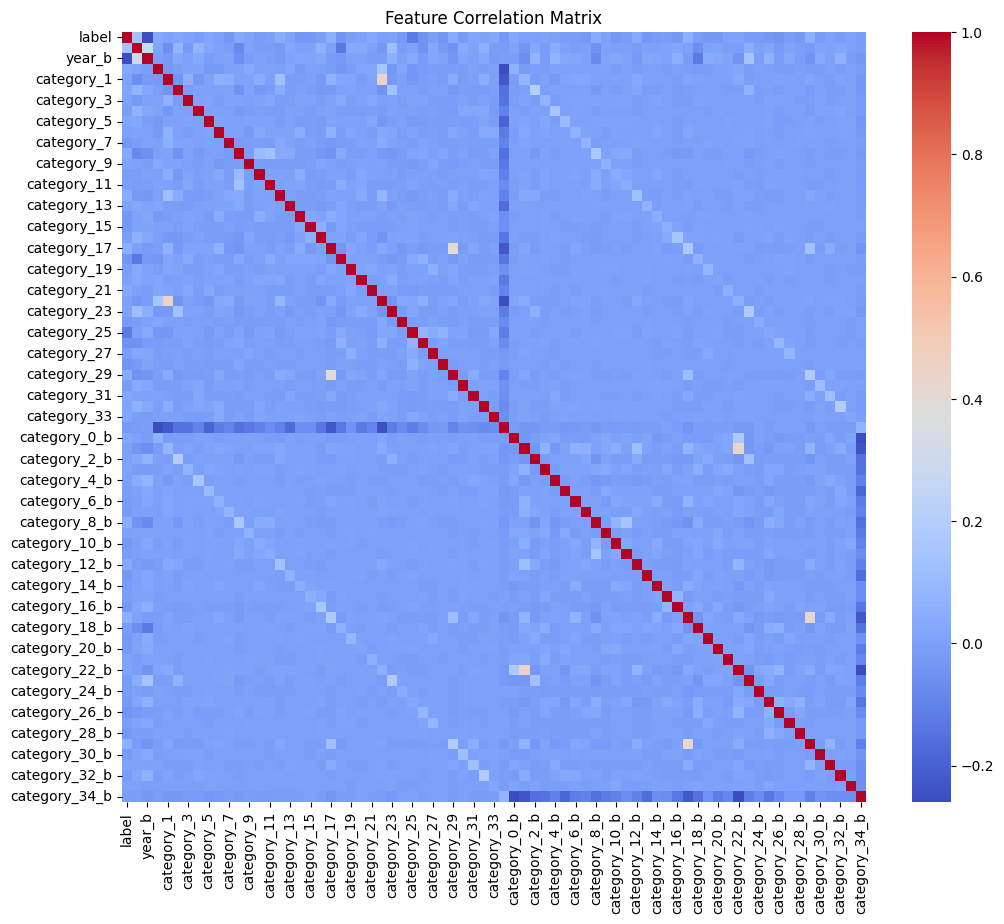

In [253]:
import seaborn as sns
correlation_features = merged_ab[['label', 'year', 'year_b'] + 
                                  [f'category_{i}' for i in range(35)] +
                                  [f'category_{i}_b' for i in range(35)]]

# Compute the correlation matrix
correlation_matrix = correlation_features.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [254]:
correlation_matrix['label'].sort_values(ascending=False)

label            1.000000
year             0.136753
category_17      0.056677
category_17_b    0.055327
category_29_b    0.051465
                   ...   
category_18     -0.041956
category_26_b   -0.043088
category_26     -0.043389
category_25     -0.120668
year_b          -0.252776
Name: label, Length: 73, dtype: float64

In [255]:
y_train

0        0
1        0
2        0
3        0
4        1
        ..
99995    1
99996    1
99997    0
99998    0
99999    0
Name: label, Length: 100000, dtype: int64

### 4. **Train a Model**

Use a traditional ML model like Random Forest:

In [256]:
X_train

,paper_a,paper_b,year,venue,category_0,category_1,category_2,category_3,category_4,category_5,...,category_26_b,category_27_b,category_28_b,category_29_b,category_30_b,category_31_b,category_32_b,category_33_b,category_34_b,title_similarity
0,1.613973,0.566903,0.167787,0.0,-0.42173,-0.372154,-0.245193,-0.239807,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,1.610877,-0.501548
1,0.629594,-1.268068,0.983917,0.0,-0.42173,-0.372154,-0.245193,-0.239807,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,-0.620780,-0.501548
2,-0.871043,0.170907,-1.231292,0.0,-0.42173,-0.372154,-0.245193,-0.239807,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,1.610877,-0.501548
3,0.031947,0.441560,-4.262631,0.0,-0.42173,-0.372154,-0.245193,-0.239807,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,1.610877,-0.501548
4,0.006332,-0.005335,-2.746962,0.0,-0.42173,2.687062,-0.245193,4.170026,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,-0.620780,0.680326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.396010,-0.411188,0.400967,0.0,-0.42173,-0.372154,-0.245193,-0.239807,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,-0.620780,-0.501548
99996,1.313804,1.529375,0.400967,0.0,-0.42173,-0.372154,-0.245193,-0.239807,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,-0.620780,-0.501548
99997,0.686150,-1.612989,-1.114702,0.0,-0.42173,2.687062,-0.245193,4.170026,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,-0.620780,-0.501548
99998,1.205668,1.351978,-0.881523,0.0,-0.42173,-0.372154,-0.245193,-0.239807,-0.166549,-0.310592,...,-0.114989,-0.03594,-0.033634,-0.165914,-0.063848,-0.087104,-0.098298,-0.094332,-0.620780,-0.501548


In [257]:
X_train.columns

Index(['paper_a', 'paper_b', 'year', 'venue', 'category_0', 'category_1',
       'category_2', 'category_3', 'category_4', 'category_5', 'category_6',
       'category_7', 'category_8', 'category_9', 'category_10', 'category_11',
       'category_12', 'category_13', 'category_14', 'category_15',
       'category_16', 'category_17', 'category_18', 'category_19',
       'category_20', 'category_21', 'category_22', 'category_23',
       'category_24', 'category_25', 'category_26', 'category_27',
       'category_28', 'category_29', 'category_30', 'category_31',
       'category_32', 'category_33', 'category_34', 'year_b', 'venue_b',
       'category_0_b', 'category_1_b', 'category_2_b', 'category_3_b',
       'category_4_b', 'category_5_b', 'category_6_b', 'category_7_b',
       'category_8_b', 'category_9_b', 'category_10_b', 'category_11_b',
       'category_12_b', 'category_13_b', 'category_14_b', 'category_15_b',
       'category_16_b', 'category_17_b', 'category_18_b', 'category_19_b

In [258]:
X_train = X_train.drop(columns=['paper_a', 'paper_b'])
X_test = X_test.drop(columns=['paper_a', 'paper_b'])


In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
clf = RandomForestClassifier(random_state=55)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7868
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     10000
           1       0.79      0.78      0.78     10000

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



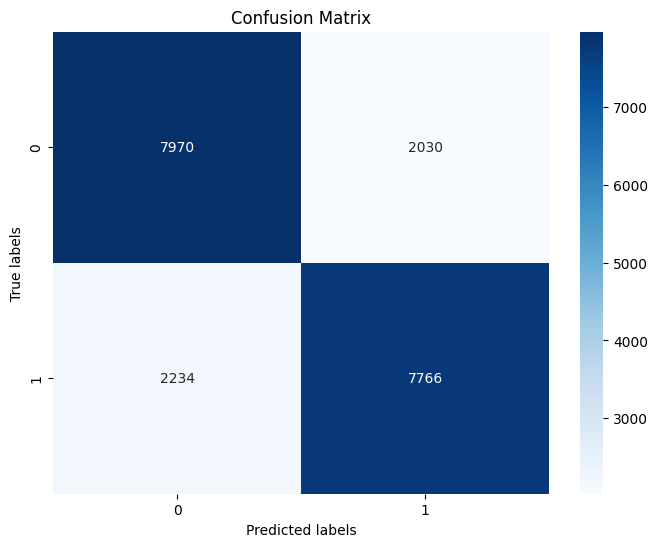

In [260]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [261]:
cm

array([[7970, 2030],
       [2234, 7766]])

### 5. **Interpretation and Next Steps**

- **Feature Importance**: Check which features contribute most:

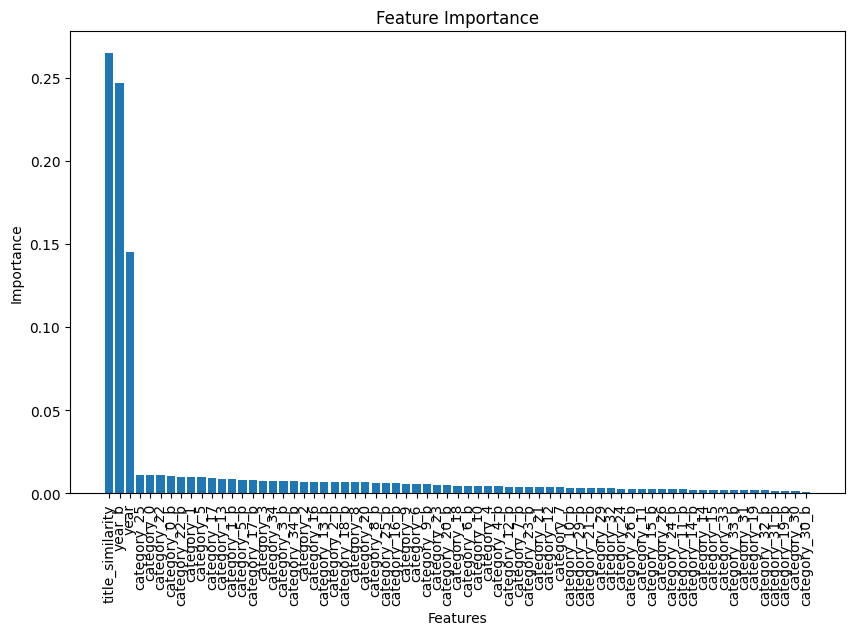

In [262]:
import matplotlib.pyplot as plt
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
selected_features = [X_train.columns[i] for i in indices if feature_importances[i] > 0.001]
selected_importances = [feature_importances[i] for i in indices if feature_importances[i] > 0.001]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, selected_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [263]:
test_pairs_df

,paper_a,paper_b,label
0,305306,482357,0
1,280356,282276,1
2,46485,116944,1
3,432786,317771,1
4,576398,625796,0
...,...,...,...
19995,511458,402074,0
19996,122478,250312,1
19997,535274,112310,0
19998,474110,547950,0


In [264]:
train_pairs_df

,paper_a,paper_b,label
0,613474,427450,0
1,429899,103315,0
2,150048,357500,0
3,318445,405309,0
4,313668,326368,1
...,...,...,...
99995,238636,254677,1
99996,557496,597464,1
99997,440446,42387,0
99998,537330,566128,0


In [265]:
assert len(set(train_df['index']).intersection(set(test_df['index']))) == 0, "Data leakage detected!"

In [266]:
def predict_citation_dynamic(test_pairs_df, df, clf, tfidf_vectorizer, X_train):
    # Randomly sample a row from test_pairs_df
    sampled_pair = test_pairs_df.sample(1).iloc[0]
    paper_a = sampled_pair['paper_a']
    paper_b = sampled_pair['paper_b']
    expected_label = sampled_pair['label']

    # Extract features for paper_a
    paper_a_data = df[df['index'] == paper_a].iloc[0]
    paper_a_features = paper_a_data.drop(['citations', 'index', 'title', 'abstract'])

    # Extract features for paper_b
    paper_b_data = df[df['index'] == paper_b].iloc[0]
    paper_b_features = paper_b_data.drop(['citations', 'index', 'title', 'abstract'])

    # Add suffix "_b" to paper_b features
    paper_b_features = paper_b_features.rename(lambda x: f"{x}_b")

    # Compute title similarity
    title_similarity = cosine_similarity(
        tfidf_vectorizer.transform([paper_a_data['title']]), 
        tfidf_vectorizer.transform([paper_b_data['title']])
    )[0][0]

    # Create the feature vector for both paper_a and paper_b
    feature_vector = {
        **paper_a_features.to_dict(),
        **paper_b_features.to_dict(),
        'title_similarity': title_similarity
    }

    # Sort the features in the same order as the training data
    feature_vector = {key: feature_vector.get(key, 0) for key in X_train.columns}

    # Prepare the final feature vector for prediction (convert to list of values)
    final_feature_vector = [float(value) for value in feature_vector.values()]

    # Make prediction using the classifier
    prediction = clf.predict([final_feature_vector])  # Pass the list, not a dictionary

    # Print details for debugging
    print(f"Sampled pair: paper_a={paper_a}, paper_b={paper_b}")
    print(f"Expected Label: {expected_label}")
    print(f"Predicted Label: {prediction[0]}")

    # Return the result
    return prediction[0], expected_label

# Usage example:
# Sample 5 rows with label 1 and 5 with label 0
positive_samples = test_pairs_df[test_pairs_df['label'] == 1].sample(2)
negative_samples = test_pairs_df[test_pairs_df['label'] == 0].sample(2)
# Use pd.concat instead of append
sampled_test_pairs = pd.concat([positive_samples, negative_samples])

for _, row in sampled_test_pairs.iterrows():
    predicted_label, expected_label = predict_citation_dynamic(test_pairs_df, df, clf, tfidf_vectorizer, X_train)
    if predicted_label == expected_label:
        print("The prediction matches the expected label.")
    else:
        print("The prediction does not match the expected label.")


Sampled pair: paper_a=281085, paper_b=455610
Expected Label: 1
Predicted Label: 1
The prediction matches the expected label.
Sampled pair: paper_a=70497, paper_b=300186
Expected Label: 1
Predicted Label: 0
The prediction does not match the expected label.
Sampled pair: paper_a=605497, paper_b=147078
Expected Label: 1
Predicted Label: 1
The prediction matches the expected label.
Sampled pair: paper_a=557196, paper_b=80671
Expected Label: 0
Predicted Label: 0
The prediction matches the expected label.


c:\Users\somma\Tommaso\D3A\Data_challenge_ENT\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\somma\Tommaso\D3A\Data_challenge_ENT\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\somma\Tommaso\D3A\Data_challenge_ENT\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\somma\Tommaso\D3A\Data_challenge_ENT\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
